In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv(r"C:\python\UberDataset.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [13]:
df.shape

(1156, 7)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [21]:
df['PURPOSE'].fillna("NOT", inplace=True)

In [27]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

In [29]:
df.head(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [31]:
from datetime import datetime

df['date'] = pd.DatetimeIndex(df['START_DATE']).date
df['time'] = pd.DatetimeIndex(df['START_DATE']).hour

In [33]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0
...,...,...,...,...,...,...,...,...,...
1151,NaT,NaT,Business,Kar?chi,Unknown Location,3.9,Temporary Site,NaT,NaN
1152,NaT,NaT,Business,Unknown Location,Unknown Location,16.2,Meeting,NaT,NaN
1153,NaT,NaT,Business,Katunayake,Gampaha,6.4,Temporary Site,NaT,NaN
1154,NaT,NaT,Business,Gampaha,Ilukwatta,48.2,Temporary Site,NaT,NaN


In [37]:

#changing into categories of day and night
df['day-night'] = pd.cut(x=df['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])

In [39]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [43]:
df.dropna(inplace=True)

In [45]:
df.drop_duplicates(inplace=True)

In [47]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)

unique_values = {}
for col in object_cols:
  unique_values[col] = df[col].unique().size
unique_values

{'CATEGORY': 2, 'START': 108, 'STOP': 112, 'PURPOSE': 7, 'date': 113}

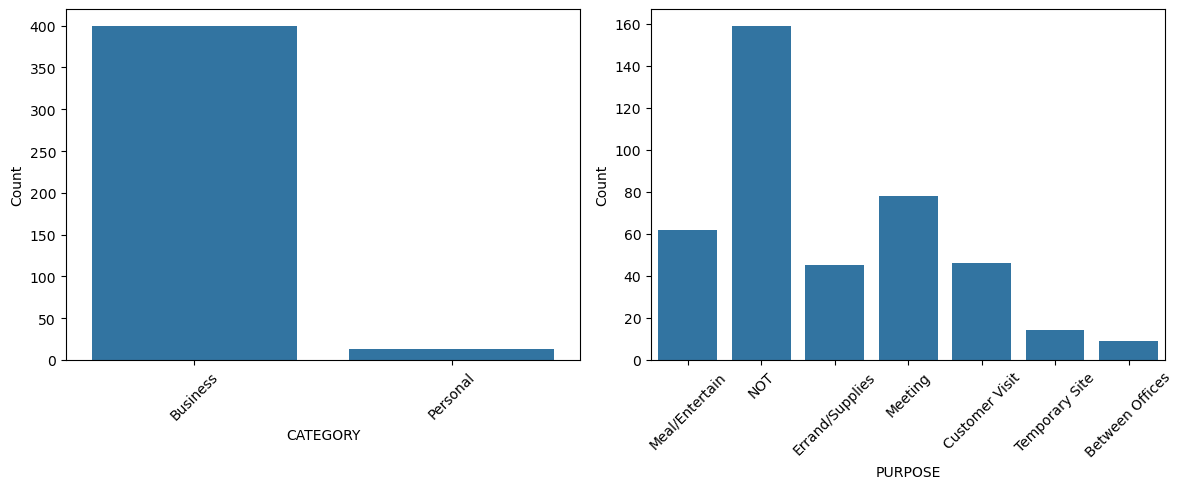

In [61]:
# Set figure size
plt.figure(figsize=(12, 5))

# First subplot for CATEGORY
plt.subplot(1, 2, 1)
sns.countplot(x=df['CATEGORY'])  # Change 'y' to 'x' for vertical bars
plt.xlabel("CATEGORY")  # Label for x-axis
plt.ylabel("Count")  # Label for y-axis
plt.xticks(rotation=45)  # Rotate labels for better readability

# Second subplot for PURPOSE
plt.subplot(1, 2, 2)
sns.countplot(x=df['PURPOSE'])  # Change 'y' to 'x' for vertical bars
plt.xlabel("PURPOSE")  # Label for x-axis
plt.ylabel("Count")  # Label for y-axis
plt.xticks(rotation=45)  # Rotate labels for better readability

# Adjust layout for better spacing
plt.tight_layout()

# Show plot
plt.show()

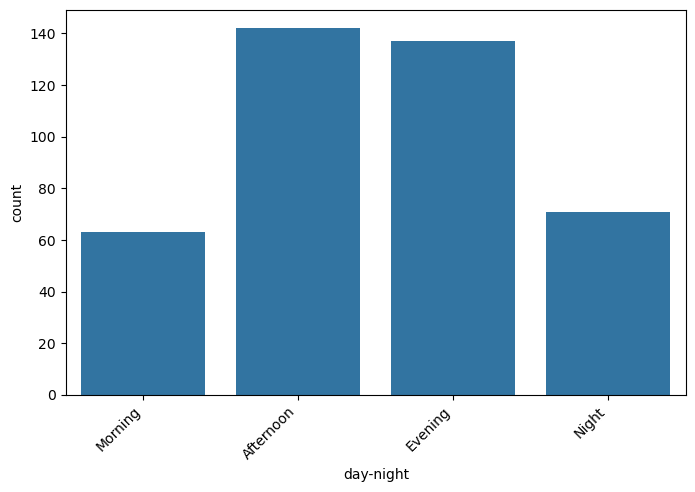

In [83]:
plt.figure(figsize=(8, 5))  # Adjust figure size if needed
sns.countplot(x=df['day-night'])  # Ensure 'x' is used instead of 'y'
plt.xticks(rotation=45, ha='right')  # Force label rotation and align to the right
plt.show()

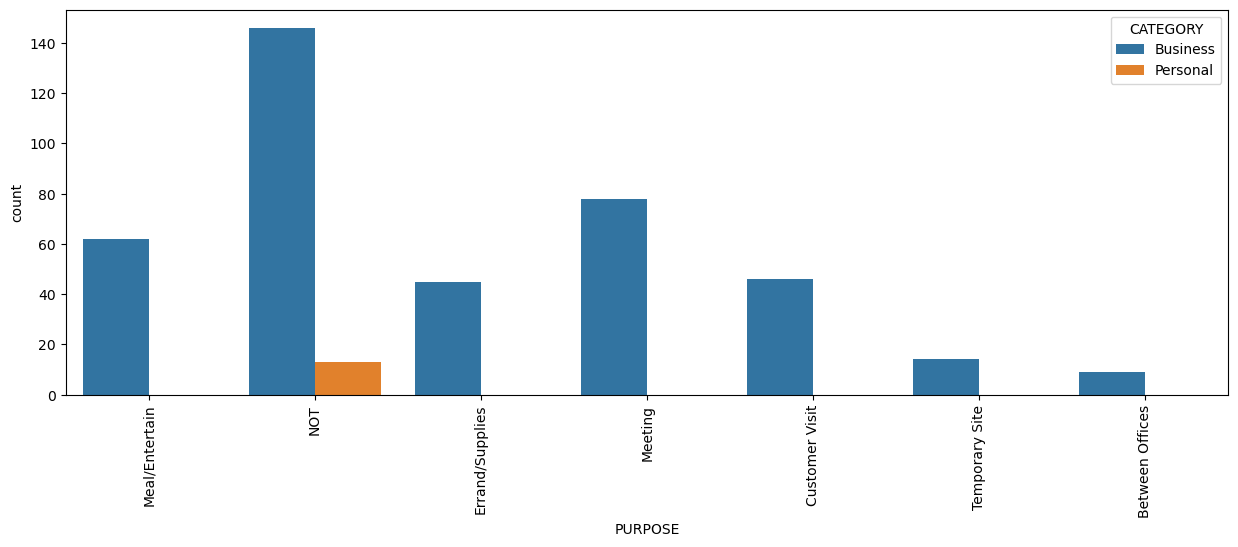

In [87]:
plt.figure(figsize=(15, 5))
sns.countplot(data=df, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()

In [89]:
#  Insights from the above count-plots : 
# Most of the rides are booked for business purpose.
# Most of the people book cabs for Meetings and Meal / Entertain purpose.
# Most of the cabs are booked in the time duration of 10am-5pm (Afternoon).

In [117]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
object_cols = ['CATEGORY', 'PURPOSE']
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))
OH_cols.index = dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = df.drop(object_cols, axis=1)
df = pd.concat([df_final, OH_cols], axis=1)

KeyError: "None of [Index(['CATEGORY', 'PURPOSE'], dtype='object')] are in the [columns]"

In [121]:
df_final

,START_DATE,END_DATE,START,STOP,MILES,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Fort Pierce,Fort Pierce,5.1,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Fort Pierce,Fort Pierce,5.0,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Fort Pierce,Fort Pierce,4.8,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Fort Pierce,Fort Pierce,4.7,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Fort Pierce,West Palm Beach,63.7,2016-01-06,14.0,Afternoon
...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Cary,Cary,3.1,2016-12-12,13.0,Afternoon
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Cary,Apex,4.4,2016-12-12,13.0,Afternoon
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Apex,Cary,4.7,2016-12-12,14.0,Afternoon
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Cary,Morrisville,3.0,2016-12-12,17.0,Evening


<Axes: >

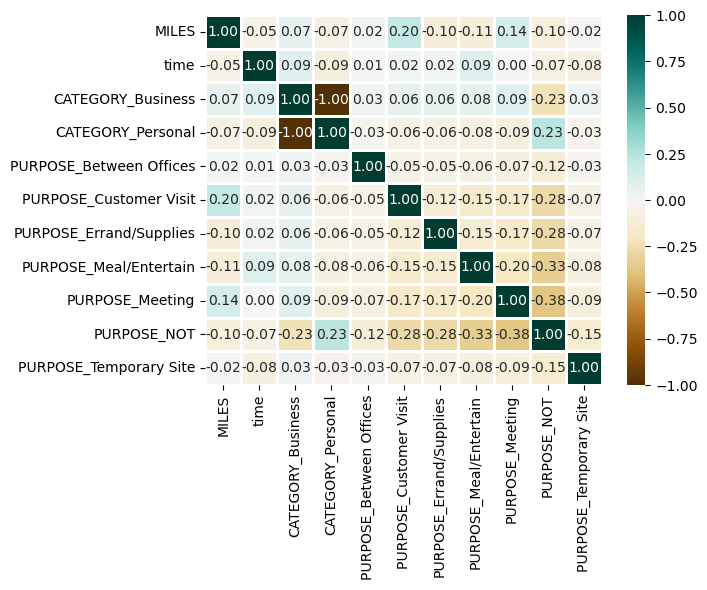

In [125]:
numeric_dataset = df.select_dtypes(include=['number'])
ns.heatmap(numeric_dataset.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)

In [127]:
# Insights from the heatmap:
# Business and Personal Category are highly negatively correlated, this have already proven earlier. So this plot, justifies the above conclusions.
# There is not much correlation between the features

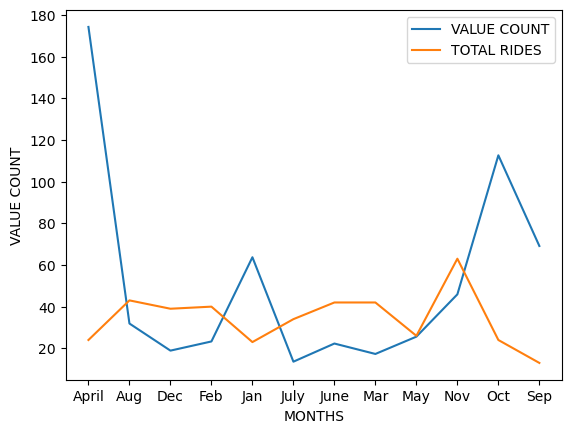

In [143]:
df["MONTH"] = pd.DatetimeIndex(df["START_DATE"]).month
df["MONTH"] = df["MONTH"].map(month_label)

# Ensure both counts and max are sorted in the same order
mon = df["MONTH"].value_counts().sort_index()

df2 = pd.DataFrame({
    "MONTHS": mon.index,  # Use index for correct months
    "VALUE COUNT": df.groupby("MONTH")["MILES"].max().reindex(mon.index)  # Align max MILES with month order
})

sns.lineplot(x=df2["MONTHS"], y=df2["VALUE COUNT"], label="VALUE COUNT")
sns.lineplot(x=df2["MONTHS"], y=mon.values, label="TOTAL RIDES")

plt.xlabel("MONTHS")
plt.ylabel("VALUE COUNT")
plt.legend()
plt.show()

In [151]:
df2

,MONTHS,VALUE COUNT
MONTH,,
April,April,174.2
Aug,Aug,31.9
Dec,Dec,18.9
Feb,Feb,23.3
Jan,Jan,63.7
July,July,13.6
June,June,22.3
Mar,Mar,17.3
May,May,25.6


In [153]:
# Inference from the Graph:
# Peak in Ride Miles (VALUE COUNT)

# The highest peak is in April, showing that the longest trip in terms of miles happened in this month.
# Another significant peak occurs in November and October.
# Total Rides Distribution (TOTAL RIDES)

# The total number of rides is more evenly distributed but shows some fluctuations.
# Peaks are observed in May and November, indicating more rides in these months.
# There is a dip in rides during September.
# Seasonal Trends

# Some months like April and October have very high-value counts, meaning few rides but with very long trips.
# Months with more total rides do not necessarily have longer trips, indicating that shorter trips might be frequent in high-ride months.
# Possible Explanations

# The high-value count in April could be due to a few exceptionally long trips, even though the number of rides is not the highest.
# The total rides in November are relatively high, which might indicate increased travel demand (e.g., holiday season travel).
# Lower ride counts in summer months (June-July) may indicate reduced Uber usage during vacations

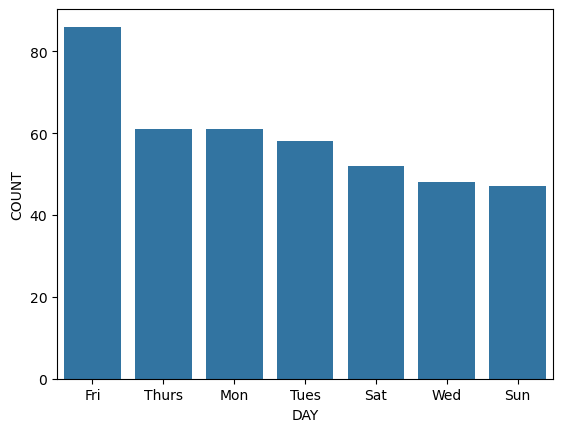

In [175]:
df['DAY'] = df['START_DATE'].dt.weekday

day_mapping = {0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thurs', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['DAY'] = df['DAY'].map(day_mapping)  # Correct mapping

# Compute day counts
day_counts = df['DAY'].value_counts()

# Fix: Ensure barplot gets correct x and y values
sns.barplot(x=day_counts.index, y=day_counts.values)

plt.xlabel('DAY')
plt.ylabel('COUNT')
plt.show()

<Axes: ylabel='MILES'>

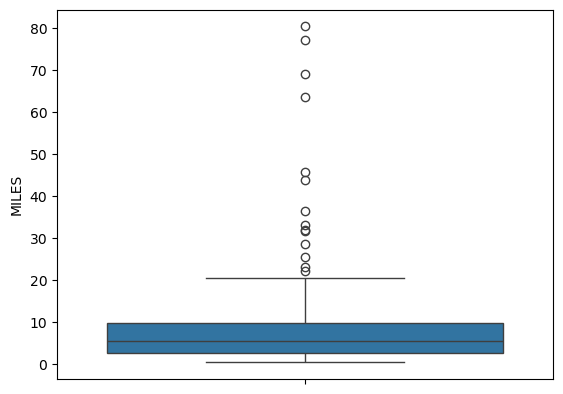

In [179]:
sns.boxplot(df[df['MILES'] < 100]['MILES'])

<Axes: xlabel='MILES', ylabel='Count'>

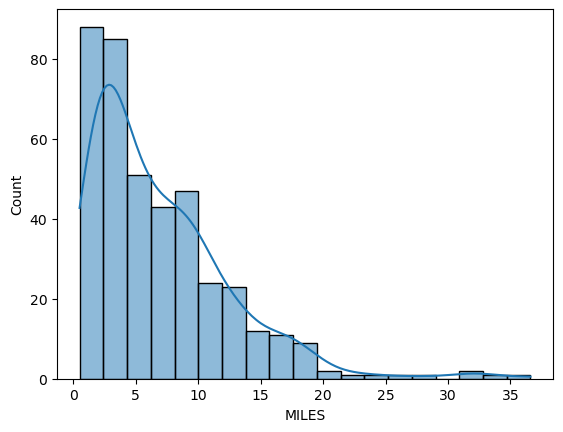

In [189]:
sns.histplot(df[df['MILES']<40]['MILES'], kde=True)

In [ ]:
# Most of the cabs booked for the distance of 4-5 miles.
# Majorly people chooses cabs for the distance of 0-20 miles.
# For distance more than 20 miles cab counts is nearly negligible